In [2]:
import tensorflow as tf
import numpy as np

In [9]:
@tf.function
def matmul_tf(x, y):
    return tf.matmul(x,y)

def matmul_np(x, y):
    return np.dot(x,y)

np.random.seed(4321)

tf_times, np_times = [],[]
for n in [100, 1000, 5000, 7500, 10000]:
    x = np.random.normal(size=[n,n]).astype('float32')
    y = np.random.normal(size=[n,n]).astype('float32')
    
    res_tf = %timeit -o matmul_tf(x,y)
    res_np = %timeit -o matmul_np(x,y)
    tf_times.append(res_tf)
    np_times.append(res_np)

165 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
22.7 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.58 ms ± 541 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.75 ms ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
93.2 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
441 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
212 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.77 s ± 7.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
384 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.23 s ± 26.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


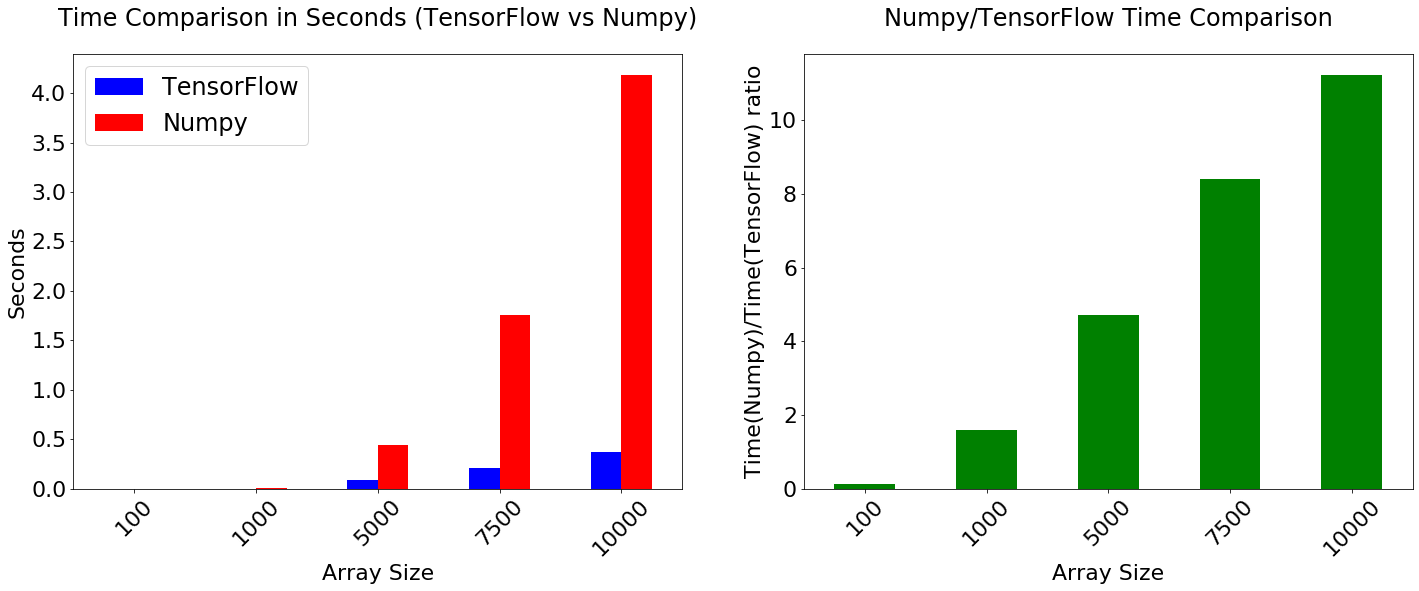

In [61]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'legend.fontsize': 24})
plt.rcParams.update({'axes.titlesize': 24})
plt.rcParams.update({'axes.labelsize': 22})
plt.rcParams.update({'xtick.labelsize': 22})
plt.rcParams.update({'ytick.labelsize': 22})
#plt.rcParams.update({'ytick.titlesize': 20})
%matplotlib inline

tf_data = [t.best for t in tf_times]
np_data = [n.best for n in np_times]

df = pd.DataFrame({"TensorFlow": tf_data, "Numpy": np_data})
df.index = [100, 1000, 5000, 7500, 10000]

_, axes = plt.subplots(1, 2, figsize=(24,8))
df.plot.bar(color=['b','r'], rot=45, ax=axes[0])
axes[0].set_xlabel('Array Size')
axes[0].set_ylabel('Seconds')
axes[0].set_title("Time Comparison in Seconds (TensorFlow vs Numpy)")
axes[0].title.set_position([.5, 1.05])

(df.Numpy/df.TensorFlow).plot.bar(color=['green'], rot=45, ax=axes[1])
axes[1].set_xlabel('Array Size')
axes[1].set_ylabel('Time(Numpy)/Time(TensorFlow) ratio')
axes[1].set_title("Numpy/TensorFlow Time Comparison")
axes[1].title.set_position([.5, 1.05])

In [31]:
df.head()

,TensorFlow,Numpy
100,0.000164,0.000023
1000,0.002329,0.003727
5000,0.092924,0.438173
7500,0.208934,1.755941
10000,0.372329,4.186329
